<a href="https://colab.research.google.com/github/sonjoy1s/kaggle_project/blob/main/Amazon_Sales_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/amazon_sales_dataset.csv")
df.head()

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72


In [9]:
df.isna().sum()

,0
order_id,0
order_date,0
product_id,0
product_category,0
price,0
discount_percent,0
quantity_sold,0
customer_region,0
payment_method,0
rating,0


In [10]:
df.nunique()

,0
order_id,50000
order_date,730
product_id,4000
product_category,6
price,31465
discount_percent,6
quantity_sold,5
customer_region,4
payment_method,5
rating,41


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,50000.0,25000.500000,14433.901067,1.00,12500.75,25000.500,37500.2500,50000.00
product_id,50000.0,2986.848740,1156.374535,1000.00,1983.00,2983.000,3989.0000,4999.00
price,50000.0,252.507260,143.025544,5.01,127.84,252.970,376.3350,499.99
discount_percent,50000.0,13.340700,9.850694,0.00,5.00,10.000,20.0000,30.00
quantity_sold,50000.0,2.999400,1.415401,1.00,2.00,3.000,4.0000,5.00
rating,50000.0,2.996316,1.154295,1.00,2.00,3.000,4.0000,5.00
review_count,50000.0,249.329280,144.251981,0.00,125.00,250.000,374.0000,499.00
discounted_price,50000.0,218.886566,127.317681,3.53,109.68,215.805,322.7025,499.91
total_revenue,50000.0,657.331475,526.223968,3.84,240.32,505.410,968.9700,2499.55


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          50000 non-null  int64  
 1   order_date        50000 non-null  object 
 2   product_id        50000 non-null  int64  
 3   product_category  50000 non-null  object 
 4   price             50000 non-null  float64
 5   discount_percent  50000 non-null  int64  
 6   quantity_sold     50000 non-null  int64  
 7   customer_region   50000 non-null  object 
 8   payment_method    50000 non-null  object 
 9   rating            50000 non-null  float64
 10  review_count      50000 non-null  int64  
 11  discounted_price  50000 non-null  float64
 12  total_revenue     50000 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 5.0+ MB


In [13]:
df.drop(columns=['order_id'],inplace=True)

In [14]:
df.head()

,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
1,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
2,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
3,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
4,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72


In [15]:
df.columns

Index(['order_date', 'product_id', 'product_category', 'price',
       'discount_percent', 'quantity_sold', 'customer_region',
       'payment_method', 'rating', 'review_count', 'discounted_price',
       'total_revenue'],
      dtype='object')

In [17]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

print(numerical_cols)

Index(['product_id', 'price', 'discount_percent', 'quantity_sold', 'rating',
       'review_count', 'discounted_price', 'total_revenue'],
      dtype='object')


In [18]:
categorical_cols = df.select_dtypes(include=['object']).columns

print(categorical_cols)

Index(['order_date', 'product_category', 'customer_region', 'payment_method'], dtype='object')


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

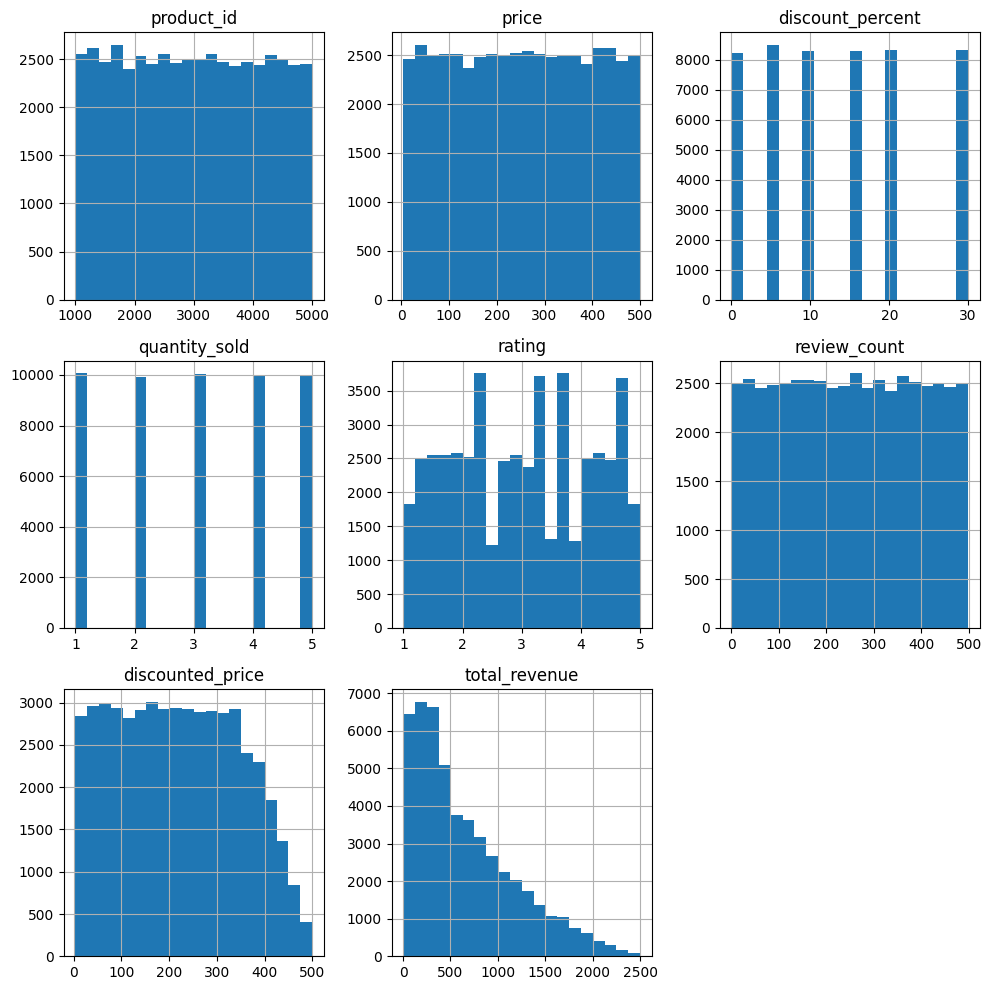

In [21]:
df[numerical_cols].hist(figsize=(10,10),bins=20)
plt.title("Numerical Columns Histrogram Plot")
plt.tight_layout()
plt.show()